---

## <span style="color:#0b486b">Examine and understand your dataset </span>
<div style="text-align: right"><span style="color:red"><span></div>

This assignment shares a similar theme with the practical lab session in week 2. You are required to work with the NUS_WIDE data for the task of face recognition.

The first step in the process is to understand your data. You are given the following segments of codes
- to import necessary libraries, 
- to define a utility function to display face images from the dataset, and
- to load the dataset.

They are provided for you to get started. Please **do not** change the provided code as well the variables and function names as you will need them to complete subsequent tasks. 

---



**Note**: The following packages will be required for this assignment. If you need to import more packages, you might append them to the end of the cell.

In [375]:
from sklearn import datasets

import logging
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
from sklearn import decomposition
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

# append your own importing packages here if needed

In [376]:
# this function is a utility to display face images from the dataset
%matplotlib inline  

def display_faces(images, label, num2display):
    fig = plt.figure(figsize=(15,15))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
    for i in range(num2display):
        p = fig.add_subplot(20,20,i+1,xticks=[],yticks=[])
        p.imshow(images[i], cmap=plt.cm.bone)
        
        p.text(0, 14, str(label[i]))
        p.text(0, 60, str(i))

**Warning**: the following command will download the dataset (approx. 200 Mb) to your local computer. You may need to install the *Pillow* package first by running the following command in the Anaconda prompt.

In [377]:
from sklearn.datasets import fetch_lfw_people
faces = datasets.fetch_lfw_people(min_faces_per_person=60, resize=0.4)

In [378]:
# store features in variable X and the label in variable y as in our usual convention notation.
X, y = faces.data, faces.target

In [379]:
print(faces.DESCR)

.. _labeled_faces_in_the_wild_dataset:

The Labeled Faces in the Wild face recognition dataset
------------------------------------------------------

This dataset is a collection of JPEG pictures of famous people collected
over the internet, all details are available on the official website:

    http://vis-www.cs.umass.edu/lfw/

Each picture is centered on a single face. The typical task is called
Face Verification: given a pair of two pictures, a binary classifier
must predict whether the two images are from the same person.

An alternative task, Face Recognition or Face Identification is:
given the picture of the face of an unknown person, identify the name
of the person by referring to a gallery of previously seen pictures of
identified persons.

Both Face Verification and Face Recognition are tasks that are typically
performed on the output of a model trained to perform Face Detection. The
most popular model for Face Detection is called Viola-Jones and is
implemented in the OpenC

In [380]:
faces.keys()

dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])

---

- variable `faces` containing the fetched dataset
- variables `X` and `y` which contain the features and the labels respectively.

We first examine the NUS_WIDE dataset. You are asked to supply your own codes in the following cells to answer the following questions.

####  <span style="color:red"></span>Printing out the description of the dataset using the variable `faces`. 
<div style="text-align: right"><span style="color:red"></span></div>

In [381]:
import pandas as pd
df_faces = pd.DataFrame(faces.data)
df_faces['target'] = pd.Categorical(pd.Series(faces.target))

In [382]:
df_faces.describe()

,0,1,2,3,4,5,6,7,8,9,...,1840,1841,1842,1843,1844,1845,1846,1847,1848,1849
count,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,...,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000
mean,91.657730,96.295807,106.113724,118.783974,130.693161,140.000763,146.908203,152.263184,157.012955,161.456284,...,96.936211,101.459000,107.686470,116.277435,124.545151,128.382553,126.331581,121.295006,114.244110,106.911407
std,46.351109,44.923618,43.431442,42.174377,40.324924,37.499157,35.836983,34.916065,33.906464,32.757744,...,45.554867,50.626778,56.942051,62.579365,68.789551,71.935867,74.754417,76.945793,77.375359,78.459785
min,0.000000,0.000000,0.333333,1.000000,1.666667,2.000000,3.666667,11.000000,11.333333,13.333333,...,1.000000,2.000000,1.000000,1.000000,1.000000,0.666667,0.000000,0.000000,0.000000,0.000000
25%,57.833333,63.333332,76.000000,92.666664,105.333336,116.666664,123.583332,130.333328,136.333328,140.916668,...,63.666668,64.333336,65.583332,68.916666,68.000000,66.916666,59.249999,48.000000,41.333332,35.333332
50%,88.666664,92.833332,104.333336,118.333336,131.666672,141.333328,147.666672,153.333328,158.333328,163.666672,...,93.333336,97.500000,101.833332,110.500000,118.000000,123.166668,121.500000,117.000000,103.000000,87.500000
75%,122.333336,125.666664,135.000000,147.083332,157.750004,164.750004,171.666672,175.333328,179.750004,183.333328,...,123.083334,130.333328,141.750004,158.583328,178.666672,191.750004,192.333328,193.083332,183.666672,175.416664
max,254.000000,254.000000,251.666672,247.000000,245.333328,246.666672,247.666672,252.666672,254.000000,253.666672,...,250.333328,250.666672,252.000000,253.333328,254.333328,254.666672,255.000000,255.000000,254.666672,255.000000


In [383]:
df_faces.describe(include=['category'])

,target
count,1348
unique,8
top,3
freq,530


####  <span style="color:red"></span>. Print out the total number of data points in this dataset.
<div style="text-align: right"><span style="color:red"></span></div> 

In [1]:
# Total number of images(datapoints) in the dataset.
print(len(faces.images))

NameError: name 'faces' is not defined

####  <span style="color:red"></span>Each class (or label) in this dataset corresponds to a public figure. Printing out the number of classes, and the corresponding person name for each class. Print out 50 photos of *Ariel Sharon* and 50 photos of *Hugo Chavez*. 
<div style="text-align: right"><span style="color:red"></span></div> 

In [385]:
#YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL

# print out the number of classes, and the corresponding name of each class
class_ids=np.unique(y)

# [insert your code here]

for i in range(len(class_ids)):
    # [insert your code here]
    print(i+1,faces.target_names[i])

1 Ariel Sharon
2 Colin Powell
3 Donald Rumsfeld
4 George W Bush
5 Gerhard Schroeder
6 Hugo Chavez
7 Junichiro Koizumi
8 Tony Blair


In [386]:
#YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
# print out 50 photos of Ariel Sharon and 50 photos of Hugo Chavez

def display_faces(images, label, num2display):
    fig = plt.figure(figsize=(25,25))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
    for i in range(num2display):
        p = fig.add_subplot(20,20,i+1,xticks=[],yticks=[])
        p.imshow(images[i], cmap=plt.cm.bone)
        
        p.text(0, 14, str(label[i]), color='red', fontsize=18)

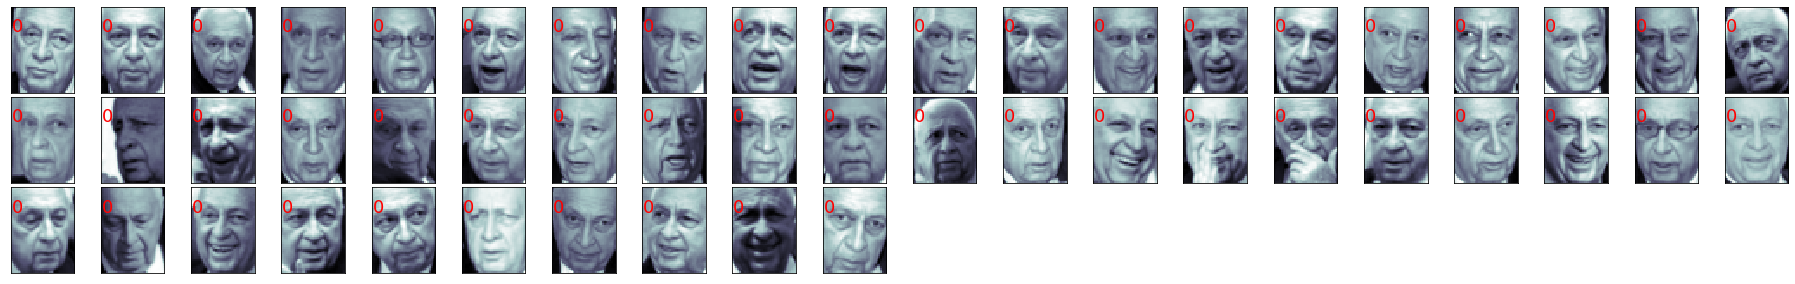

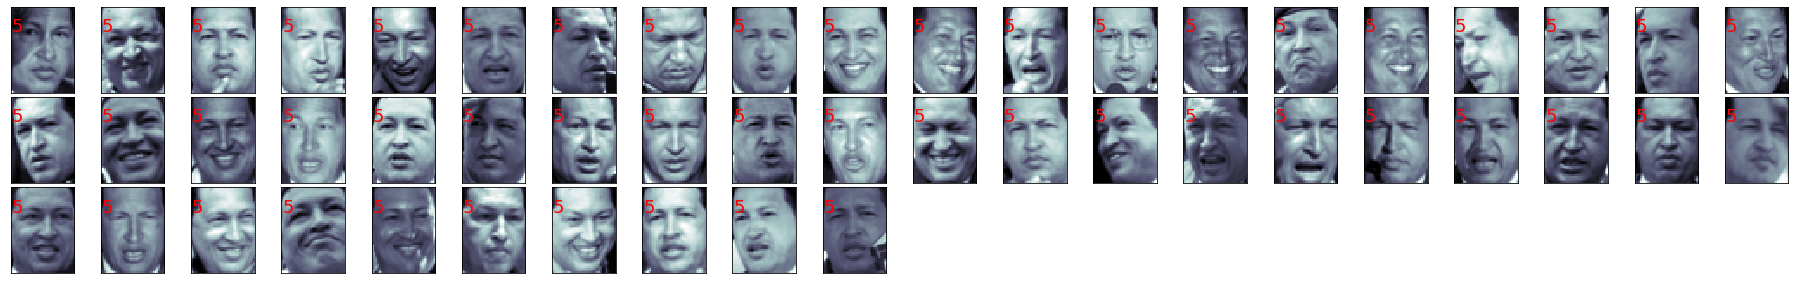

In [387]:
# Ariel Sharon 1 , Hugo Chavez 6
X1 = np.isin(faces.target,0)
X2 = np.isin(faces.target,5)
X1 = np.where(X1)
X2 = np.where(X2)  
display_faces(faces.images[X1],faces.target[X1],50)
display_faces(faces.images[X2],faces.target[X2],50)

###  <span style="color:red"></span>create *a single train-split* with 20% of data for testing and the rest for training.
<div style="text-align: right"><span style="color:red"></span></div> 

In [388]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=32)

In [389]:
print(f"Number of training samples:\t{len(X_train)}")
print(f"Number of testing samples:\t{len(X_test)}")

Number of training samples:	1078
Number of testing samples:	270


---

### <span style="color:#0b486b">Build Model  </span>
<div style="text-align: right"><span style="color:red"<span></div>

In [390]:
pca = decomposition.PCA(n_components=20)
print(pca)
pca_X= pca.fit_transform(X)

PCA(copy=True, iterated_power='auto', n_components=20, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)


In [391]:
X_train, X_test, y_train, y_test = train_test_split(pca_X, y, test_size = 0.4, random_state=32)

from sklearn.pipeline import Pipeline

# create a logistic regression
logistic = LogisticRegression(penalty='l1', dual=False,\
              tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1,\
              class_weight=None, random_state=None, solver='liblinear', \
            max_iter=100, multi_class='ovr', verbose=0, warm_start=False, n_jobs=1)

pipe_face_recognition = Pipeline(steps=[('pca', pca),
                                        ('logistic', logistic)
                                       ])



In [392]:
train_model = pipe_face_recognition.fit(X_train, y_train)

pred_results = train_model.decision_function(X_test)

# Here, we need to use the argmax function to return the most likely predictive label.
pred_labels = [np.argmax(pred_results[i]) for i in range(len(pred_results))]

# print out the classification report
target_names=["person " + str(i) for i in range(len(np.unique(y)))]
print(metrics.classification_report(pred_labels, y_test, target_names=target_names))

              precision    recall  f1-score   support

    person 0       0.33      0.77      0.47        13
    person 1       0.65      0.60      0.62        97
    person 2       0.62      0.64      0.63        44
    person 3       0.82      0.67      0.73       266
    person 4       0.11      0.29      0.16        17
    person 5       0.46      0.52      0.49        25
    person 6       0.67      0.91      0.77        22
    person 7       0.51      0.52      0.51        56

    accuracy                           0.63       540
   macro avg       0.52      0.61      0.55       540
weighted avg       0.68      0.63      0.65       540



In [393]:
for i in range(10):
    print(f'{test_y[i]} is predicted as {pred_labels[i]}')

3 is predicted as 3
3 is predicted as 2
4 is predicted as 5
3 is predicted as 3
7 is predicted as 5
4 is predicted as 3
3 is predicted as 3
3 is predicted as 3
7 is predicted as 4
3 is predicted as 3


In [394]:
accuracy_score(test_y,pred_labels)

0.6296296296296297

<span style="color:red"></span> Use the reduced dimension features pca_X obtained in step 
- To write your code to show the performance (recall, precision, accuracy, F-score) 
- using Repeated Random Train-Split* (10 runs, each with 60/40 split for training and testing) on the original data
- You *must* report both the mean and standard deviation of the performance for each evaluation metrics.
<div style="text-align: right"> <span style="color:red"></span> </div>

In [395]:
from sklearn import datasets
from sklearn import decomposition
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import average_precision_score


In [396]:
estimators = []
estimators.append(('pca', decomposition.PCA(n_components=20)))
estimators.append(('logistic', LogisticRegression(penalty='l1')))
model = Pipeline(estimators)

# evaluate pipeline
for i in range(10):
    kfold = StratifiedShuffleSplit(n_splits=10,test_size = 0.4) # split into training and testing sets with n_splits times.
    results = cross_val_score(model, X, y, cv=kfold) # run the model with n_splits datasets and evaluate output.
    print(results)# print accuracy for n_splits times of data
    print(results.mean())
    print(results.std())

    
    

C:\Users\vikkp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\vikkp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\vikkp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\vikkp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\vikkp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default so

[0.63148148 0.64074074 0.60555556 0.62962963 0.59444444 0.62222222
 0.60740741 0.63703704 0.61296296 0.62777778]
0.6209259259259259
0.014393309297646711


C:\Users\vikkp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\vikkp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\vikkp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\vikkp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\vikkp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default so

[0.58703704 0.63703704 0.58518519 0.61296296 0.63333333 0.61111111
 0.60555556 0.59444444 0.59814815 0.61296296]
0.6077777777777779
0.016703662642636577


C:\Users\vikkp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\vikkp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\vikkp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\vikkp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\vikkp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default so

[0.64074074 0.61481481 0.61481481 0.61296296 0.64074074 0.59259259
 0.61296296 0.61481481 0.61111111 0.62037037]
0.6175925925925926
0.013462593606426548


C:\Users\vikkp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\vikkp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\vikkp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\vikkp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\vikkp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default so

[0.61296296 0.61851852 0.60555556 0.60925926 0.61666667 0.59444444
 0.64074074 0.61666667 0.61111111 0.5962963 ]
0.6122222222222222
0.012317251220974728


C:\Users\vikkp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\vikkp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\vikkp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\vikkp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\vikkp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default so

[0.62037037 0.62777778 0.59814815 0.62962963 0.60925926 0.62407407
 0.62592593 0.6        0.59444444 0.6037037 ]
0.6133333333333333
0.012931177963034146


C:\Users\vikkp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\vikkp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\vikkp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\vikkp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\vikkp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default so

[0.62222222 0.60555556 0.65925926 0.58333333 0.62592593 0.58888889
 0.62037037 0.59259259 0.60185185 0.61481481]
0.6114814814814815
0.021175988679885623


C:\Users\vikkp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\vikkp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\vikkp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\vikkp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\vikkp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default so

[0.62592593 0.64074074 0.62037037 0.61296296 0.60740741 0.61481481
 0.62037037 0.57777778 0.62592593 0.5962963 ]
0.6142592592592593
0.01658519180189437


C:\Users\vikkp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\vikkp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\vikkp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\vikkp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\vikkp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default mu

[0.56666667 0.61851852 0.58888889 0.5962963  0.62037037 0.58518519
 0.63148148 0.62592593 0.63333333 0.63148148]
0.6098148148148148
0.022422706745122856


C:\Users\vikkp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\vikkp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\vikkp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\vikkp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\vikkp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default so

[0.59074074 0.60740741 0.57592593 0.5962963  0.59444444 0.62037037
 0.60185185 0.60925926 0.61851852 0.64814815]
0.6062962962962962
0.018797892652517793


C:\Users\vikkp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\vikkp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\vikkp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\vikkp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\vikkp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default so

[0.61481481 0.62592593 0.58703704 0.63888889 0.60555556 0.6037037
 0.59259259 0.62407407 0.6        0.59814815]
0.609074074074074
0.01559188878503094


C:\Users\vikkp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


<span style="color:red"></span> **Use the reduced dimension features pca_X obtained in last step to show the performance (recall, precision, accuracy, F-score) using *K-fold cross-validation with k=10 folds*.**
<div style="text-align: right"> <span style="color:red"></span> </div>

In [397]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL

from sklearn.model_selection import KFold
estimators = []
estimators.append(('pca', decomposition.PCA(n_components=20)))
estimators.append(('logistic', LogisticRegression(penalty='l1')))
model = Pipeline(estimators)


kfold = StratifiedShuffleSplit(n_splits=10,test_size = 0.4) # split into training and testing sets with n_splits times.
results = cross_val_score(model, X, y, cv=10) # run the model with n_splits datasets and evaluate output.

print(results) # print accuracy for n_splits times of data
print(results.mean())
print(results.std())



C:\Users\vikkp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\vikkp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\vikkp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\vikkp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\vikkp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default so

[0.57246377 0.56617647 0.61029412 0.58823529 0.66666667 0.55555556
 0.6119403  0.60902256 0.67669173 0.65151515]
0.6108561608428006
0.04018364419679647


<span style="color:red"></span> **Preparing a table to summarize the performances against recall, precision, accuracy and F-score. What conclusions can you draw from the comparison?**
<div style="text-align: right"> <span style="color:red"></span> </div>

Answer: Summary Table for Repeated Random Trian Split:
[0.62777778 0.62222222 0.61296296 0.60740741 0.61111111 0.62592593
 0.6037037  0.61296296 0.58703704 0.59259259]
0.6103703703703703
0.012701057925542403


Summary table for k-fold cross validation: 
[0.57246377 0.56617647 0.61029412 0.58823529 0.66666667 0.55555556
 0.60447761 0.60902256 0.67669173 0.65909091]
0.6108674679436599
0.04106117299655699



Summary Table for Logistic Regression:
  precision    recall  f1-score   support

           person 0       0.33      0.77      0.47        13
    person 1       0.65      0.60      0.62        97
    person 2       0.62      0.62      0.62        45
    person 3       0.82      0.67      0.74       264
    person 4       0.11      0.29      0.16        17
    person 5       0.46      0.52      0.49        25
    person 6       0.67      0.91      0.77        22
    person 7       0.51      0.51      0.51        57

    accuracy                           0.63       540
   macro avg       0.52      0.61      0.55       540
weighted avg       0.68      0.63      0.65       540

As it can be seen Logistic Regression has the highest accuracy level as compared to Repeated Random Train Split and k-fold cross validation. Also, the accuracy of k-fold cross validation is slight;y better than that of Repeated Random Train split.


<span style="color:red"></span> **Once you have built some intuition about the problem and the effectiveness of some modelling choices, if the initial results aren't too bad, you should start to gain some confidences in your approach. You are recommended to look at your results in the previous question again to convince yourselves of your results. Some questions you should starting asking are: Is your average prediction accuracy over 50%? over 70%? What else can you try to make it better? Is Linear SVM a good choice? Did the reduced dimension help improve the performance?**

**The next step is then to 'package' your code into some routine so that your investigation into your machine learning problem can be accelerated.**

The total marks for this question are <span style="color:red"></span>, with the following detailed breakdown sub-questions:

**The following function is provided for you as an example of how one might 'package' the important steps so far into a single function to help accelerate your analyses**.

In [398]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

def ml_algorithm_screening_face(X,y,model, model_name, scoring_metrics, pca_dim, n_runs):
    estimators = []
    seed = 10
    if (pca_dim > 0):
        estimators.append(('pca', decomposition.PCA(n_components=pca_dim)))
    
    estimators.append((model_name,model))
    pipeline = Pipeline(estimators)
    kfold = KFold(n_splits=n_runs, random_state=seed)
    try:
        results = cross_val_score(pipeline, X, y, cv=kfold, scoring=scoring_metrics, verbose=1, n_jobs=-1)
    except ValueError:
        print("Opps! something went wrong!")
        
    return results

<span style="color:red"></span> **Write your code to call this function with the following specifications and print out the mean and standard deviation of the *accuracy* obtained.**
    - model: Linear SVM (using hinge loss)
    - PCA dimnesion = 20
    - the number of runs=10
    
<div style="text-align: right"> <span style="color:red"></span> </div>

In [399]:
#from sklearn import accuracy_score
svm_model =svm.SVC() 

Model_1 = ml_algorithm_screening_face(X, y, svm_model,'B', 'accuracy', 20, 10)
print(np.mean(Model_1))
print(np.std(Model_1))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    5.0s remaining:    3.3s


0.3931674958540631
0.028947582148334962


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    6.0s finished


<span style="color:red"></span>**Face recognition has a high-dimensional data problem typical  in modern machine learning. This explains why one might routinely use PCA to reduce its dimension.**

**writing code to search for right dimension from a list of *dim = {10, 20,..,150}* using the same setting in question 2.2(a).**
- Print out the results for each dimension.
- Use box-plot to visualize the medium and the interquartile range of the accuracy for each dimension on the same figure, and 
- Report the dimension for PCA that gives the best result in term of accuracy.

<div style="text-align: right"> <span style="color:red"><span> </div>

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    2.2s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    3.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


PCA: 10 Mean = 0.2789828634604754 Std-Dev = 0.03749300442529123


[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    3.5s remaining:    2.3s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    5.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


PCA: 20 Mean = 0.34647871752349363 Std-Dev = 0.06014514232715545


[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    4.1s remaining:    2.7s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    6.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


PCA: 30 Mean = 0.4087230514096186 Std-Dev = 0.051573641821939624


[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    5.1s remaining:    3.3s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    8.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


PCA: 40 Mean = 0.48076838032061914 Std-Dev = 0.061561193678313156


[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    6.3s remaining:    4.2s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   10.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


PCA: 50 Mean = 0.5163460475400774 Std-Dev = 0.06738369516834844


[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    7.1s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   11.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


PCA: 60 Mean = 0.5155776672194582 Std-Dev = 0.049171095679362765


[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    8.1s remaining:    5.4s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   12.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


PCA: 70 Mean = 0.5704809286898839 Std-Dev = 0.05026171383198696


[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    9.5s remaining:    6.3s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   14.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


PCA: 80 Mean = 0.5378496406854615 Std-Dev = 0.052762514744777896


[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:   11.2s remaining:    7.4s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   16.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


PCA: 90 Mean = 0.5727307904919845 Std-Dev = 0.043051387259893985


[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:   11.8s remaining:    7.8s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   17.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


PCA: 100 Mean = 0.5890326147042565 Std-Dev = 0.027029646070043746


[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:   12.2s remaining:    8.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   18.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


PCA: 110 Mean = 0.5912493090105031 Std-Dev = 0.04892232528432345


[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:   13.3s remaining:    8.8s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   20.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


PCA: 120 Mean = 0.6112437810945274 Std-Dev = 0.042362214510202924


[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:   13.9s remaining:    9.2s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   20.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


PCA: 130 Mean = 0.6046323935876174 Std-Dev = 0.03789140882939915


[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:   15.0s remaining:   10.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   22.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


PCA: 140 Mean = 0.6305914870093975 Std-Dev = 0.04719793577486204


[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:   15.1s remaining:   10.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   23.3s finished


PCA: 150 Mean = 0.6245881702598121 Std-Dev = 0.05593158824254365


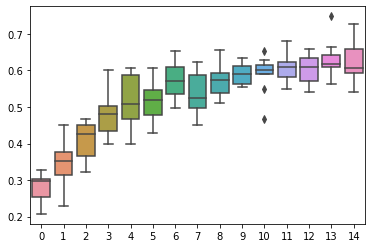

In [400]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import LinearSVC 
import seaborn as sns
%matplotlib inline



model_name = 'hng_loss'
model = LinearSVC(loss = 'hinge')
scoring_metrics = 'accuracy'
n_runs=10
data1 = []
pca_dims = np.arange(10, 160, 10)

for i in range(15):
    pca_dim=(i+1)*10
    accuracy = ml_algorithm_screening_face(X,y,model, model_name, scoring_metrics, pca_dim, n_runs)
    data1.append(accuracy)
    print("PCA: "+str(pca_dim)+" Mean = "+str(np.array(accuracy).mean())+ " Std-Dev = "+str(np.array(accuracy).std()))
    
    

fig = sns.boxplot(data=data1)

###  Best Value of n is 140 with mean.63 and std. dev .04